In [1]:
import numpy as np
import xgboost
import shap

/Users/uc/miniconda3/envs/shap_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# simulate some binary data and a linear outcome with an interaction term
# note we make the features in X perfectly independent of each other to make
# it easy to solve for the exact SHAP values
N = 2000
X = np.zeros((N,5))
X[:1000,0] = 1

X[:500,1] = 1
X[1000:1500,1] = 1

X[:250,2] = 1
X[500:750,2] = 1
X[1000:1250,2] = 1
X[1500:1750,2] = 1

X[:125,3] = 1
X[250:375,3] = 1
X[500:625,3] = 1
X[750:875,3] = 1
X[1000:1125,3] = 1
X[1250:1375,3] = 1
X[1500:1625,3] = 1
X[1750:1875,3] = 1
Xunminus = X.copy()
#X[:,:4] -= 0.5#0.4999 # we can't exactly mean center the data or XGBoost has trouble finding the splits
y = 2* X[:,0] - 3 * X[:,1] + 2 * X[:,1] * X[:,2]# + 10

In [3]:
print(np.mean(y))

0.0


In [4]:
print(X.mean(0))
print(Xunminus.mean(0))

[0.5 0.5 0.5 0.5 0. ]
[0.5 0.5 0.5 0.5 0. ]


In [5]:
Xd = xgboost.DMatrix(Xunminus, label=y)
model = xgboost.train({
    'eta':1, 'max_depth':4, 'base_score': 0, "lambda": 0
}, Xd, 1)

In [6]:
print(explainer.expected_value)

NameError: name 'explainer' is not defined

In [7]:
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

1.1920929e-07

In [8]:
shap_interaction_values = explainer.shap_interaction_values(Xd)

In [9]:
shap_interaction_values[0].round(3)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -1.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [10]:
shap_interaction_values[1].round(3)

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -1.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]], dtype=float32)

In [11]:
print(np.unique(shap_interaction_values[:, 0, 0]).round(2))

[-1. -1.  1.  1.]


In [12]:
print(np.unique(shap_interaction_values[:, 1, 1]).round(2))

[-1. -1. -1.  1.  1.]


In [13]:
print(2 * np.unique(shap_interaction_values[:, 2, 1]).round(2))

[-0.5  0.5]


In [14]:
from matplotlib.pyplot import *

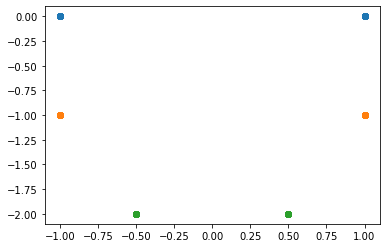

In [15]:
scatter(shap_interaction_values[:, 0, 0], np.full((N, ), 0))
scatter(shap_interaction_values[:, 1, 1], np.full((N, ), -1))
scatter(2 * shap_interaction_values[:, 1, 2], np.full((N, ), -2))

In [ ]:
print(np.unique(y).round(3))